<h1>El Proyecto Capstone - La Batalla de los Vecindarios (Semana 2)

<h2>Los restaurantes del Sr. Artega

<h3>IBM - Curso 9 - Semana 5 - Daniel González

<h2>Introducción:

La Rioja es una Comunidad Autónoma del norte de España muy conocida por la producción de sus buenos vinos y productos de la agricultura y la ganadería. Aun así, no se conocen mucho ciertos productos en la propia comunidad. Amancio Artega, un gran empresario riojano, desea instalar dos restaurantes de tres tenedores en la misma comunidad autónoma, situados en sitios que puedan abarcar toda la región.

Se concreta una reunión con el Sr. Artega y se expresa lo deseado y las limitaciones del proyecto.

Los procesos para el desarrollo del proyecto son:

1. Búsqueda de todos los municipios de la Comunidad Autónoma de La Rioja en wikipedia, obteniendo las coordenadas de cada municipio (longitud y latitud).
2. Diseño del dataframe, con limpieza y validación de datos.
3. Uso de foursquare para la localización de restaurantes en la región para comprobar la factivilidad del proyecto y comprobar la necesidad de construir los restaurantes.
4. Uso de agrupación mediante k-means con k=2, ya que se requieren 2 restaurantes.
5. Conclusión con los municipios seleccionados.

<h2>Datos:

Para la realización del análisis de la construcción de los posibles restaurantes del Sr. Artega, se necesitarán:

1. Dataframe con identificadores, municipio, latitud y longitud de los pueblos que forman la Comunidad Autónoma de La Rioja. Se consultó wikipedia para concocer los municipios. Se hizo una búsqueda en google para encontrar las latitudes y longitudes. Se copnstruyó un archivo excel pegando toda la información, ajustando en filas y columnas. Se pueden consultar los archivos rioja_3cols.docx y rioja_3cols.xlsx en github.
2. Información de los restaurantes de la zona con capital de la comunidad Logroño a través de una conexión a foursquare.

Importamos paquetes:

In [1]:
import numpy as np # librería para manejar datos vectorizados
import random # librería para generar números aleatorios
import pandas as pd # librería para análisis de datos
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # librería para manejar archivos JSON 
!pip install geopy
#!conda install -c conda-forge geopy --yes # retirar el comentario de esta línea si no ha completado el laboratorio de la API de FourSquare 
from geopy.geocoders import Nominatim # convertir una dirección en valores de latitud y longitud
import requests # librería para manejar solicitudes
from pandas.io.json import json_normalize # librería para convertir un archivo json en un dataframe pandas
# Matplotlib y módulos asociados para graficar
import matplotlib.cm as cm
import matplotlib.colors as colors
# importar k-means desde la fase de agrupación
from sklearn.cluster import KMeans
! pip install folium==0.5.0
#!conda install -c conda-forge folium=0.5.0 --yes # retirar el comentario de esta línea si no ha completado el laboratorio de la API de FourSquare
import folium # librería para graficar mapas 
# librerías para mostrar imágenes 
from IPython.display import Image 
from IPython.core.display import HTML 
print('Libraries imported.')

Libraries imported.


Leemos los datos de un archivo excel y los almacenamos en un dataframe. Son los datos de los nombres, latitudes y longitudes de los municipios de la comunidad autónoma a analizar, La Rioja.

In [2]:
archivo = 'rioja_3cols.xlsx'
df = pd.read_excel(archivo, sheet_name='Hoja1')
df

,Municipio,Latitude,Longitude
0,Abalos,42.566346,-2.703494
1,Agoncillo,42.436223,-2.278838
2,Aguilar-del-Rio-Alhama,41.953681,-1.992602
3,Ajamil,42.163950,-2.437591
4,Albelda-de-Iregua,42.365209,-2.470559
5,Alberite,42.400099,-2.409601
6,Alcanadre,42.404298,-2.151741
7,Aldeanueva-de-Ebro,42.229137,-1.909551
8,Alesanco,42.423931,-2.818765
9,Aleson,42.407625,-2.670687


Revisamos las propiedades del dataframe:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Municipio  140 non-null    object 
 1   Latitude   140 non-null    float64
 2   Longitude  140 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.4+ KB


<h2>Metodología:

Realizaremos un estudio de tipo exploratorio a través de segmentación con 2-means.

Consultamos en foursquare los restaurantes cercanos a la ciudad de Logroño, capital de la comunidad Autónoma de La Rioja:

In [4]:
address = 'Logroño, España'
geolocator = Nominatim(user_agent="Logroño")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Logroño are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Logroño are 42.4661196, -2.4396676.


Generamos un mapa en el que se incluyen los municipios del estudio. Se puede observar que cada punto está dentro del límite de la comunidad de La Rioja, marcada por una linea gris gruesa.

In [5]:
# crear un mapa de La Rioja utilizando los valores de latitud y longitud
map_logrono = folium.Map(location=[latitude, longitude], zoom_start=9)

# añadir marcadores al mapa
for lat, lng, mun in zip(df['Latitude'], df['Longitude'], df['Municipio']):
    label = '{}, {}'.format(mun, lat)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_logrono)  
map_logrono

(La imagen no sale en github. Ver riojamap.png que es captura)

Definimos las variables que formarán parte de la conexión con foursquare:

In [247]:
# conexión a foursquare
CLIENT_ID = '2GQBW5PR0QFXTOGCHKTRFWJBTGOFOHXW1TRTNRAFURQ5FE1X'
CLIENT_SECRET = '3QH40WMZIIDSQN1RFAVAEQHUIMOQUJPKYPABQVNTSDQJN2YD'
VERSION = 20220221
LIMIT = 1000

In [248]:
search_query = 'Restaurante'
radius = 1000
print(search_query + ' .... OK!')

Restaurante .... OK!


In [249]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=2GQBW5PR0QFXTOGCHKTRFWJBTGOFOHXW1TRTNRAFURQ5FE1X&client_secret=3QH40WMZIIDSQN1RFAVAEQHUIMOQUJPKYPABQVNTSDQJN2YD&ll=42.4661196,-2.4396676&v=20220221&query=Restaurante&radius=1000&limit=1000'

Obtenemos la información de los restaurantes cercanos a la capital de la comunidad autónoma:

In [250]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '62133bd3762b955b4cfcde61'},
 'response': {'venues': [{'id': '4c76017508dcef3b20be22cf',
    'name': 'Restaurante San Miguel',
    'location': {'address': 'Calle República Argentina 36',
     'lat': 42.461495,
     'lng': -2.449871,
     'labeledLatLngs': [{'label': 'display',
       'lat': 42.461495,
       'lng': -2.449871}],
     'distance': 983,
     'postalCode': '26002',
     'cc': 'ES',
     'city': 'Logroño',
     'state': 'La Rioja',
     'country': 'España',
     'formattedAddress': ['Calle República Argentina 36',
      '26002 Logroño La Rioja',
      'España']},
    'categories': [{'id': '4bf58dd8d48988d1c0941735',
      'name': 'Mediterranean Restaurant',
      'pluralName': 'Mediterranean Restaurants',
      'shortName': 'Mediterranean',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/mediterranean_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1645427667',
    'hasPerk': False},
   {'id

In [251]:
# asignar la parte relevante del JSON a la variable venues
venues = results['response']['venues']

# convertir venues en un dataframe
dataframe = json_normalize(venues)
dataframe.head()

/var/folders/07/m83db_k133s8vxy9s3mgfgkr0000gn/T/ipykernel_3560/2493495112.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe = json_normalize(venues)


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,venuePage.id
0,4c76017508dcef3b20be22cf,Restaurante San Miguel,"[{'id': '4bf58dd8d48988d1c0941735', 'name': 'M...",v-1645427667,False,Calle República Argentina 36,42.461495,-2.449871,"[{'label': 'display', 'lat': 42.461495, 'lng':...",983,26002,ES,Logroño,La Rioja,España,"[Calle República Argentina 36, 26002 Logroño L...",NaN,NaN
1,55ab9991498e4517468a7efd,Restaurante Muralla China,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",v-1645427667,False,NaN,42.464062,-2.439207,"[{'label': 'display', 'lat': 42.46406173706055...",232,NaN,ES,NaN,NaN,España,[España],NaN,NaN
2,5b9367bcf193c0002c0ecc61,Restaurante,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1645427667,False,NaN,42.469062,-2.432853,"[{'label': 'display', 'lat': 42.469062, 'lng':...",648,26004,ES,Logroño,La Rioja,España,"[26004 Logroño La Rioja, España]",NaN,NaN
3,4c5427e2a724e21e376feaf5,Restaurante El Portalon,"[{'id': '4bf58dd8d48988d1c0941735', 'name': 'M...",v-1645427667,False,NaN,42.466326,-2.444541,"[{'label': 'display', 'lat': 42.46632621632193...",400,NaN,ES,NaN,NaN,España,[España],NaN,NaN
4,5ac78319a22db76045c03a14,Restaurante Ajo Negro,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1645427667,False,"Calle Hermanos Moroy, 1",42.465797,-2.445941,"[{'label': 'display', 'lat': 42.465797, 'lng':...",516,26001,ES,Logroño,La Rioja,España,"[Calle Hermanos Moroy, 1, 26001 Logroño La Rio...",NaN,NaN


In [252]:
# mantener unicamente las columnas que incluyan el nombre del lugar y cualquier cosa asociada a la ubicación
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# función para extraer la categoría del lugar
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filtrar la categoría para cada fila
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# limpiar la columna "names" manteniendo solo el último término
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Restaurante San Miguel,Mediterranean Restaurant,Calle República Argentina 36,42.461495,-2.449871,"[{'label': 'display', 'lat': 42.461495, 'lng':...",983,26002,ES,Logroño,La Rioja,España,"[Calle República Argentina 36, 26002 Logroño L...",NaN,4c76017508dcef3b20be22cf
1,Restaurante Muralla China,Asian Restaurant,NaN,42.464062,-2.439207,"[{'label': 'display', 'lat': 42.46406173706055...",232,NaN,ES,NaN,NaN,España,[España],NaN,55ab9991498e4517468a7efd
2,Restaurante,Restaurant,NaN,42.469062,-2.432853,"[{'label': 'display', 'lat': 42.469062, 'lng':...",648,26004,ES,Logroño,La Rioja,España,"[26004 Logroño La Rioja, España]",NaN,5b9367bcf193c0002c0ecc61
3,Restaurante El Portalon,Mediterranean Restaurant,NaN,42.466326,-2.444541,"[{'label': 'display', 'lat': 42.46632621632193...",400,NaN,ES,NaN,NaN,España,[España],NaN,4c5427e2a724e21e376feaf5
4,Restaurante Ajo Negro,Restaurant,"Calle Hermanos Moroy, 1",42.465797,-2.445941,"[{'label': 'display', 'lat': 42.465797, 'lng':...",516,26001,ES,Logroño,La Rioja,España,"[Calle Hermanos Moroy, 1, 26001 Logroño La Rio...",NaN,5ac78319a22db76045c03a14
5,Restaurante Chino Casa Alegría,Asian Restaurant,Jorge Vigón,42.461709,-2.441240,"[{'label': 'display', 'lat': 42.46170910750235...",507,NaN,ES,Logroño,La Rioja,España,"[Jorge Vigón, Logroño La Rioja, España]",NaN,4f7cc3bde4b08ccdc57a7bd5
6,Restaurante Akelarre,Spanish Restaurant,los portales,42.466380,-2.446239,"[{'label': 'display', 'lat': 42.46638, 'lng': ...",540,26001,ES,Logroño,La Rioja,España,"[los portales, 26001 Logroño La Rioja, España]",NaN,59b3d74c0d173f341f6431d8
7,Restaurante Boragos,Restaurant,Plaza del Mercado 2,42.466633,-2.446309,"[{'label': 'display', 'lat': 42.46663300000001...",548,26001,ES,Logroño,La Rioja,España,"[Plaza del Mercado 2, 26001 Logroño La Rioja, ...",NaN,5380ce00498e0086eae3c95a
8,Restaurante Pan y Vino,Spanish Restaurant,Avd Portugal 23,42.464834,-2.450480,"[{'label': 'display', 'lat': 42.4648341456205,...",899,26001,ES,Logroño,La Rioja,España,"[Avd Portugal 23, 26001 Logroño La Rioja, España]",NaN,4db33e84f7b121c29f32ef2f
9,Restaurante Hindú Taj Mahall,Indian Restaurant,Gonzalo De Berceo,42.460932,-2.439014,"[{'label': 'display', 'lat': 42.46093189184853...",579,NaN,ES,Logroño,La Rioja,España,"[Gonzalo De Berceo, Logroño La Rioja, España]",NaN,50b92747e4b05d0a8d6e399a


In [253]:
dataframe_filtered.name

0             Restaurante San Miguel
1          Restaurante Muralla China
2                        Restaurante
3            Restaurante El Portalon
4              Restaurante Ajo Negro
5     Restaurante Chino Casa Alegría
6               Restaurante Akelarre
7                Restaurante Boragos
8             Restaurante Pan y Vino
9       Restaurante Hindú Taj Mahall
10       Restaurante & Asador Mr. LI
11            Restaurante Entrecepas
12          restaurante entrepuentes
13                  Restaurante NIZA
14           Restaurante Portales 24
15              Restaurante La Union
16               Restaurante Ezcaray
17             Restaurante Herventia
18         Restaurante Asador Matute
19                 Restaurante Iruña
20              Restaurante La Senda
21               Restaurante Karachi
22           Restaurante Carabanchel
23          Restaurante El cachetero
24          Restaurante Buenos Aires
25            Restaurante Avenida 21
26            Restaurante la Galeria
2

Importamos alguna librería más, ya que realizaremos un análisi de clústers con k-medias, con k=2, ya que el señor Artega quiere construir dos restaurantes en zonas representativas y utilizando este análisis podremos encontrar además los centroides que cubren de la mejor forma toda la región de la comunidad de La Rioja.

In [254]:
import matplotlib.pyplot as plt # librería para graficar 
# backend para graficar diagramas en el explorador
%matplotlib inline 

from sklearn.cluster import KMeans 
#from sklearn.datasets.samples_generator import make_blobs -no funcionaaaa
from sklearn.datasets import make_blobs

print('Libraries imported.')

Libraries imported.


Formamos el vector de componentes para primero poder representar gráficamente toda la nube de puntos (es similar a la que aparece en el mapa anterior).

In [255]:
dfdos = df[["Latitude", "Longitude"]]

In [256]:
X = dfdos.to_numpy()

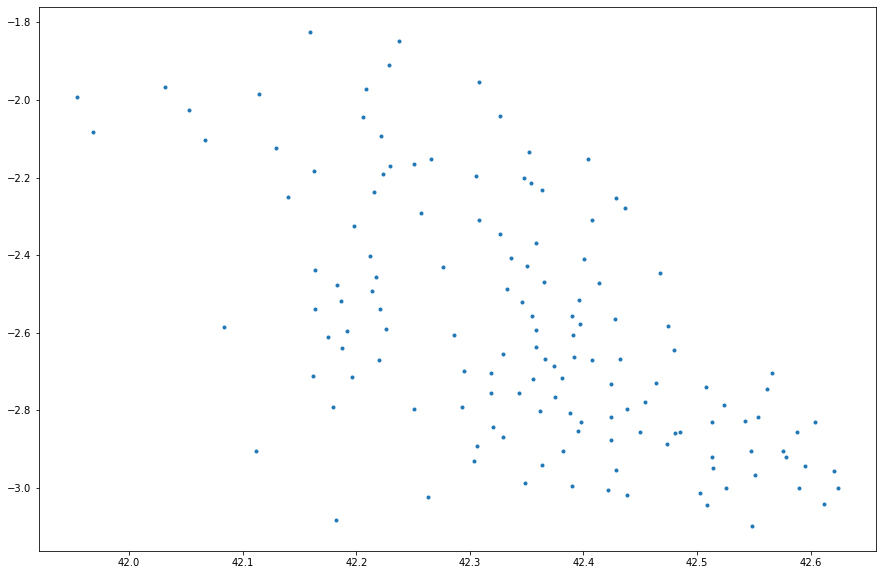

In [257]:
plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], marker='.')

Realizamos ahora el análisis con k-means indicando 2 categorías o clústers:

In [258]:
k_means = KMeans(init="k-means++", n_clusters=2, n_init=12)

In [259]:
k_means.fit(X)

KMeans(n_clusters=2, n_init=12)

In [260]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1], dtype=int32)

In [261]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[42.4081085 , -2.80418974],
       [42.24963476, -2.249029  ]])

Obtenemos los centroides, vemos la separación de los dos grupos y realizamos las conclusiones:

Centroide: 42.249634758134036 ,  -2.2490289953398146
Centroide: 42.408108501259285 ,  -2.804189744102442


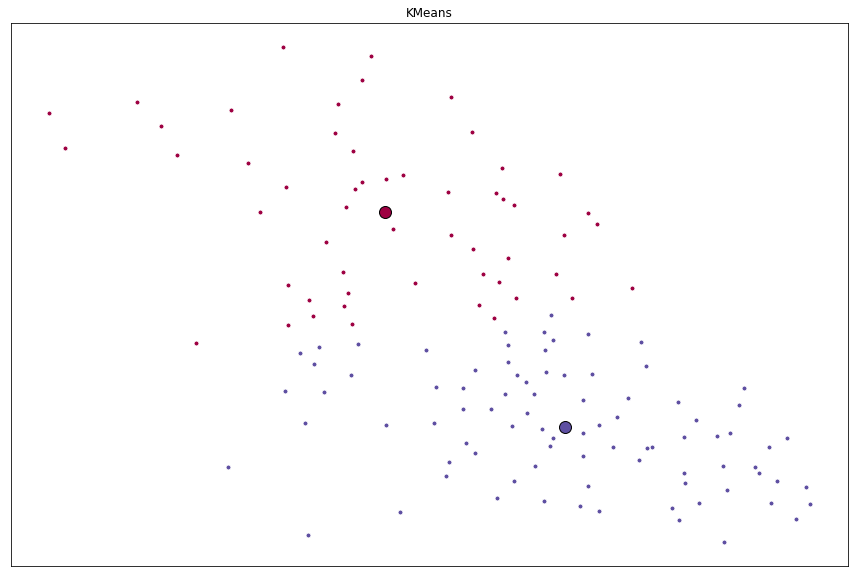

In [217]:
# incializar la gráfica con las dimensiones especificadas.
fig = plt.figure(figsize=(15, 10))

# colors utiliza un mapa de colores, el cual producirá un arreglo de colores con base
# al número de etiqueta. Utilzaremos set(k_means_labels) para obtener las 
# etiquetas unicas.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# generar una gráfica
ax = fig.add_subplot(1, 1, 1)

# haga un ciclo a traves de los datos y grafique los puntos y centroides.
# k estará en el rango de 0 a 3 lo cual emparejará el número de agrupaciones en el conjunto de datos.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # crear una lista de todos los puntos, donde los que estan en
    # la agrupación estan etiquetados como verdaderos y los que no
    # como falsos
    my_members = (k_means_labels == k)
    
    # definir el centroide o centro de la agrupación
    cluster_center = k_means_cluster_centers[k]
    
    # graficar los puntos con color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.', markersize=10)
    
    # graficar los centroides con el color especificado pero con contorno mas oscuro
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=12)
    print('Centroide:', cluster_center[0],', ', cluster_center[1] )
# título de la gráfica
ax.set_title('KMeans')

# remover las marcas del eje x
ax.set_xticks(())

# remover las marcas del eje y
ax.set_yticks(())

# mostrar la gráfica
plt.show()

Luego, se puede ver en rojo los municipios que estarían más cerca de uno de los dos restaurantes y en morado, del otro. Se abarca toda la comunidad autónoma de La Rioja.

<h2> Resultados:

Restaurante 1 (rojo) localizado en el municipio de: Soto-en-Cameros

Restaurante 2 (morado) localizado en el municipio de: Aleson

<h2> Debate:

Debido a la región analizada, no se encontraron muchos datos para hacer un análisis más extenso. No se encontraron muchos datos de restaurantes y actualmente es conocido (por redes sociales) que existen más restaurantes de los indicados. Además, de los restaurantes que se encontraron, no se disponía de todos los datos.

<h2>Conclusiones:

Hoy en día, saber realizar análisis de datos es muy importante tanto como para pequeñas empresas como para grandes multinacionales. Los científicos de datos tienen en sus manos herramientas muy poderosas para poder realizar multitud de análisis impensables para las autoridades de esas empresas. Dedicar recursos a estas actividades puede significar un éxito en poco tiempo y no realizarlas puede llevar a una bancarrota segura. 

En este caso, un empresario ficticio quiere abarcar un sector del mercado de una región española analizando los municipios de la zona usando una segmentación con 2 espacios en las que además se pueden obtener esos municipios donde puede poner los restaurantes (los centroides) no teniendo que ser justo en el centro de la población, si no que incluso en las afueras del núcleo urbano, ya que este típo de análisis nos dan muy buenas aproximaciones.

El Sr. Artega ya ha comenzado con las dos construcciones. 

¡Le esperamos!
